In [23]:
import pandas as pd
import numpy as np
import os

# Background: 

Examine and address business inquiries regarding a comprehensive dataset spanning 12 months of sales. The dataset encompasses a multitude of electronics store transactions, providing detailed insights into monthly sales, product categories, costs, purchase addresses, and other relevant information.


### Combine 12 csv files (one for each month) into one csv file

In [24]:
# Combine 12 csv files (one for each month) into one csv file
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data_copy.csv")
    

In [25]:
all_data = pd.read_csv("all_data.csv")
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"
186849,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301"


## Clean data (Preprocessing)


### Drop rows of NAN

In [26]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())


all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### --------------------------------------------------------------------------------------------------------------------------------


# Task 1: what was the best month for sales? How much was earned that month? 


### Get rid of text in order date column

In [27]:
# remove the error that says we have 'or' as a value instead of month number 
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Make columns correct type

In [28]:
# convert columns to correct type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])# convert to int 
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # convert to float


## Augment data with additional columns

### Add a Month and Sales column

In [29]:
# add new column for the month mm/dd/yyyy
all_data['Month'] = all_data['Order Date'].str[0:2] # a string
all_data['Month'] =all_data['Month'].astype('int32') # converted to int


# now to solve the task we add a sales column 
all_data['Sales'] =  all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Group data by the month 

In [30]:

# Now we can use the group by method to group sales by month 
results = all_data.groupby('Month').sum()


### Plot the results

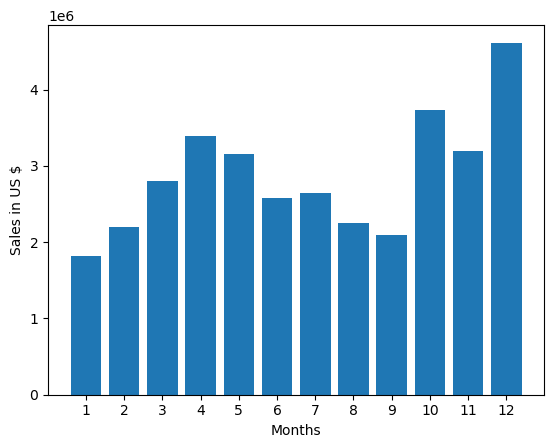

In [31]:
# now we'll plot the results
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['Sales'])

plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in US $")

plt.show()


# Analysis: 
### From the bar chart we can say December was the month with the most sales ! 

### --------------------------------------------------------------------------------------------------------------------------------

# Task 2: What US city has heighest number of sales ?


### Augment a new column for the city along with the state

In [32]:
# add a new column for the city including the state 

def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

# another way: 
#all_data['City'] = all_data['Purchase Address'].str.split(',').str[-2].str.strip()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


### Group the data by the city 

In [33]:
# group by the city 
results2 = all_data.groupby('City').sum()


### Plot the results 

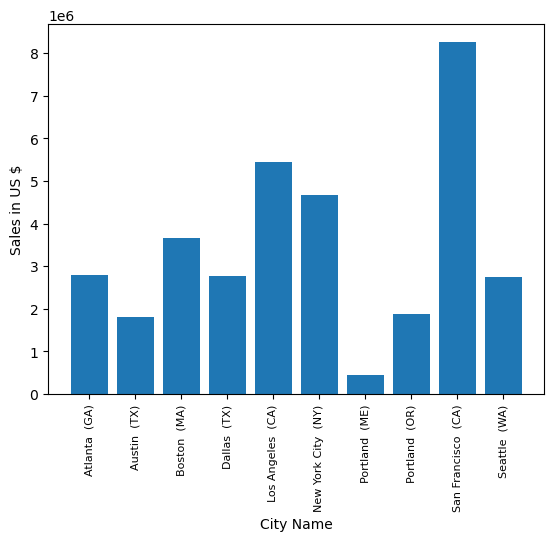

In [10]:
# now we'll plot the results
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results2['Sales'])

plt.xticks(cities , rotation ='vertical', size = 8)
plt.xlabel("City Name")
plt.ylabel("Sales in US $")

plt.show()

# Analysis: 
### From the bar chart we can say San Francisco (CA) is the city with the heighest sales !

### --------------------------------------------------------------------------------------------------------------------------------

# Task 3: What time should we advertise to maximize liklihood of customer buying a product?


### convert 'Order date' column to a date time object to extract the time 

In [35]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


### now we group data by the hour along with the minutes

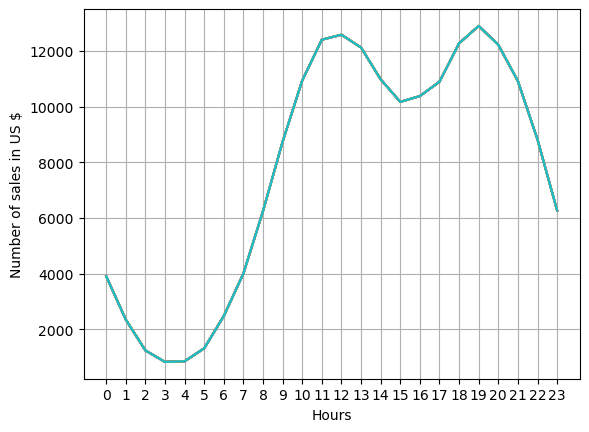

In [14]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours , all_data.groupby(['Hour']).count())


plt.xticks(hours)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Number of sales in US $")


plt.show()

# Analysis: 
### Here we can see the most purchaces were made at 12:00pm and 7:00pm so advertizing during those times are the most effective


### --------------------------------------------------------------------------------------------------------------------------------

# Task 4: What products are most often sold together ?

In [37]:
# based on Order Id evaluate the pruchased items 
# order ID thats not duplicated is not important since the persom only purchased one item which is irrelevent to this task 
df2 = all_data[all_data['Order ID'].duplicated(keep = False)]

# make a new column that combines all the products purchased with the same Order ID
df2['Grouped items'] = df2.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

# now we have repeated columns for each item purchased by the same order 
# so drop out occurances of the order id
df2 = df2[['Order ID' ,'Grouped items']].drop_duplicates()

df2

/var/folders/_y/df1ljy3d1zx8kx1rzr60t8l40000gn/T/ipykernel_29713/4031993754.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Grouped items'] = df2.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Grouped items
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
186798,222863,"27in FHD Monitor,Bose SoundSport Headphones"
186804,222868,"iPhone,Apple Airpods Headphones"
186819,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,"Google Phone,USB-C Charging Cable"


### now iterate throught the 'Grouped items' column and count the pairs that are frequently purchased together 


In [38]:
from itertools import combinations
from collections import Counter

# loop throught the list of lists the output will be a dictionary 
count = Counter()

for row in df2['Grouped items']: 
    row_list = row.split(',') # to get a list of items
    count.update(Counter(combinations(row_list, 2))) # here 2 gives the most 2 items purchased together
    count.update(Counter(combinations(row_list, 3))) # here 3 gives the most 3 items purchased together
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

# Analysis: 
### Here we can see the most two items purchaced together are (iphone) and (Lightning Charging Cable) !

### --------------------------------------------------------------------------------------------------------------------------------

# Task 5: What products sold the most ? Why do you think it sold the most?

### group by products then see which product sold the most throught the quantity ordered or by the sales value


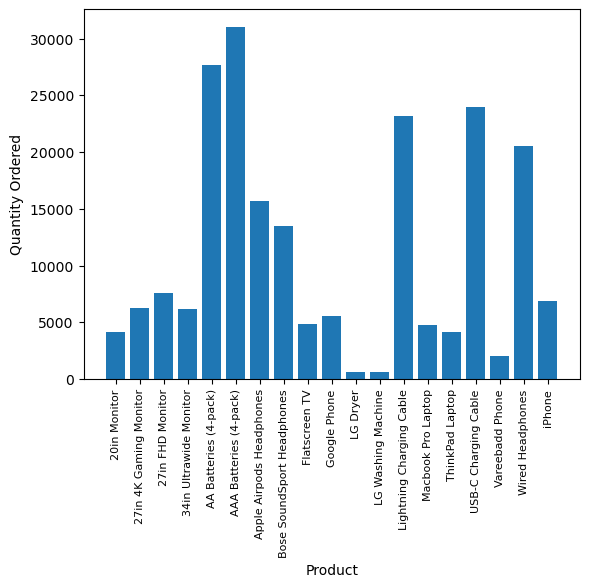

In [39]:
df3 = all_data.drop('Order Date', axis=1)

product_grouped = df3.groupby('Product')
quantity = product_grouped.sum()['Quantity Ordered'] # sum the Quantity Ordered column 


products = [product for product, df in product_grouped]

plt.bar(products , quantity)
plt.xticks(products,rotation ='vertical',size = 8)  # Display every 2nd month
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

### adding a second y-axis to see the correlation of price with the most sold product

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64


/var/folders/_y/df1ljy3d1zx8kx1rzr60t8l40000gn/T/ipykernel_29713/3067107362.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
/var/folders/_y/df1ljy3d1zx8kx1rzr60t8l40000gn/T/ipykernel_29713/3067107362.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


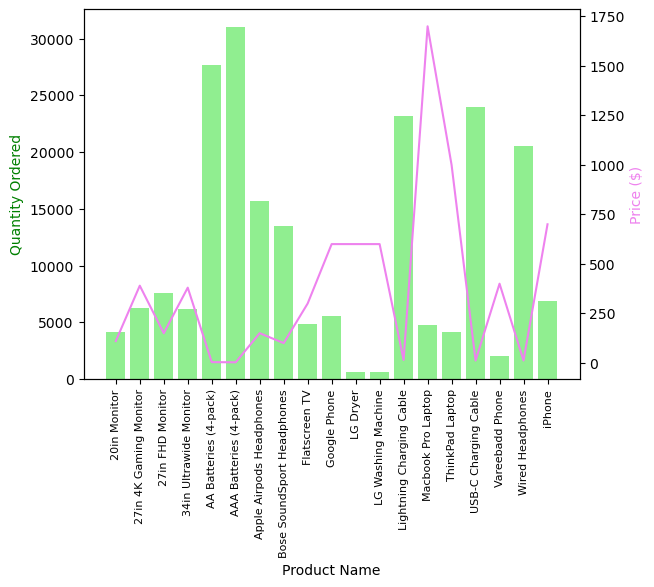

In [42]:
# extracting the price of each product 
prices = all_data.groupby('Product')['Price Each'].mean()

# Sorting the result in ascending order (from min to max)
result_sorted = prices.sort_values()
 
print(result_sorted)

#add a third axis (second y-axis) in the graph to show the price
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity, color='lightgreen')
ax2.plot(products, prices, color='violet')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='violet')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

# Analysis: 
## The most sold item was AAA Batteries since batteries are cheap as shown from the price curve above. 

### --------------------------------------------------------------------------------------------------------------------------------